In [2]:
## Notebook env: mirtud_env (mirtud_env kernel)
### This notebook analyzes how well the model in MAVE_trial.ipynb (and MAVE_trial.nbconvert.ipynb)
## learned the data by analyzing the pearson Rs for each cell between inputted raw data and 
## MAVE reconstructed output data
### The notebook also looks at stabilization of loss functions 


%load_ext rpy2.ipython

In [3]:
%%R
library(ggplot2)
library(stringr)
library(tidyr)
library(ggpointdensity)

In [58]:
int(8.6)

8

In [54]:
%%R
Loss <- read.csv('/home/ssobti/projects/mir_tud/output_data/mave_output/MAVE_trial_triplet_loss_weight_100/logs/training.log.2022-12-15_00032037.544412', sep ='\t')
colnames(Loss)[2] <- 'Total_Loss'
colnames(Loss)[2] <- 'Total_Loss'
Loss$Recon_Loss <- str_sub(Loss$Recon_Loss, start = 8, end = 17)
Loss$KLD_Loss <- str_sub(Loss$KLD_Loss, start = 8, end = 13)
Loss$Classification_Loss <- str_sub(Loss$Classification_Loss, start = 8, end = 13)
Loss$Triplet_Loss <- str_sub(Loss$Triplet_Loss, start = 8, end = 13)
Loss$Recon_Loss[395] <- '16729'
Loss[,3:6] <- apply(Loss[,3:6], 2, as.numeric)
Loss

    Epoch Total_Loss Recon_Loss KLD_Loss Classification_Loss Triplet_Loss
1       0   351.7493   22787.01   8.5973              5.9979       2.8039
2       1   299.5178   20677.67   7.5660              6.0049       3.5003
3       2   281.1491   19215.78   4.2864              5.9957       3.3811
4       3   274.1386   19655.32   2.6428              5.9674       2.7547
5       4   271.1426   19453.31   2.2521              5.9611       2.0958
6       5   269.5094   19301.52   2.2810              5.9323       2.1917
7       6   268.3989   19454.21   2.2440              5.9373       2.1856
8       7   266.8788   18648.46   2.0684              5.9263       2.0821
9       8   265.9902   18936.01   2.0767              5.9282       1.8658
10      9   264.9151   18707.41   2.0082              5.9155       1.6983
11     10   263.8382   18811.15   2.0068              5.9098       1.8860
12     11   262.4313   18417.28   1.7794              5.9031       1.6887
13     12   261.5129   18801.06   1.62

110   109   238.1963   17036.24   2.0496              5.2571       1.9903
111   110   237.9279   16826.23   1.9531              5.3241       1.7188
112   111   238.2425   17511.05   2.0685              5.3253       1.7402
113   112   237.8034   16873.83   2.0450              5.1922       1.4913
114   113   237.8506   16818.01   1.9837              5.2935       1.6924
115   114   238.0862   17099.44   2.0856              5.3085       1.8552
116   115   237.4896   16568.74   2.0612              5.3011       1.7005
117   116   237.6814   16892.18   2.0279              5.2596       1.6931
118   117   237.6635   16893.28   2.0856              5.1831       1.8898
119   118   237.3689   16669.32   2.0290              5.2812       1.9605
120   119   237.4022   16815.33   2.0814              5.2644       1.7779
121   120   237.2891   16778.04   2.0616              5.2396       1.6681
122   121   237.5755   16917.27   2.0221              5.3342       1.7767
123   122   237.4524   17206.60   1.95

220   219   235.0616   16561.66   2.0138              5.2195       1.8571
221   220   234.9241   16747.04   2.0803              5.0571       1.6674
222   221   234.9780   16861.64   2.0317              5.0359       2.0259
223   222   234.8204   16594.85   2.0498              5.0887       1.9434
224   223   235.0341   16887.77   1.9907              5.1950       2.0662
225   224   235.0635   16932.75   2.0858              5.0483       1.6241
226   225   234.7926   16775.24   2.0469              5.1294       1.9856
227   226   234.7741   16734.82   2.0850              5.2003       1.9417
228   227   234.8639   16845.29   2.0156              5.2031       1.7643
229   228   234.8535   16724.29   2.0339              5.2455       2.0154
230   229   234.6771   16541.03   2.0750              5.0432       1.8600
231   230   234.5887   16639.37   1.9743              4.9835       1.7749
232   231   234.6419   16549.65   2.2012              5.1356       1.9402
233   232   234.6235   16710.92   2.06

330   329   233.9523   16640.35   2.0398              5.1051       1.4942
331   330   234.1097   16806.96   2.0480              5.2349       2.1962
332   331   234.1506   16899.95   2.0955              4.9979       1.6771
333   332   234.4325   17250.96   2.0434              5.0915       1.8263
334   333   234.0762   16912.46   2.0117              5.0282       1.8124
335   334   234.1888   16862.46   2.0122              5.1996       2.0817
336   335   234.0505   16774.26   2.0261              5.2107       1.8721
337   336   233.8763   16415.39   1.8845              5.0994       2.0140
338   337   234.0699   16945.78   2.0029              5.1272       1.5984
339   338   234.3189   17006.00   2.0024              5.1563       1.7351
340   339   234.1666   16810.91   1.9651              5.1796       1.8748
341   340   234.0305   16808.54   2.0210              5.1217       2.1166
342   341   234.1985   16820.86   1.9375              5.2164       1.8487
343   342   234.1489   17114.33   2.07

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [13]:
%%R
Loss <- read.csv('/home/ssobti/projects/mir_tud/output_data/mave_output/MAVE_trial_triplet_loss_weight_100/logs/training.log.2022-12-15_00032037.544412', sep ='\t')
colnames(Loss)[2] <- 'Total_Loss'
colnames(Loss)[2] <- 'Total_Loss'
Loss$Recon_Loss <- str_sub(Loss$Recon_Loss, start = 8, end = 17)
Loss$KLD_Loss <- str_sub(Loss$KLD_Loss, start = 8, end = 13)
Loss$Classification_Loss <- str_sub(Loss$Classification_Loss, start = 8, end = 13)
Loss$Triplet_Loss <- str_sub(Loss$Triplet_Loss, start = 8, end = 13)
Loss$Recon_Loss[395] <- '16729'
Loss[,3:6] <- apply(Loss[,3:6], 2, as.numeric)


Loss$Recon_Loss <- Loss$Recon_Loss/max(Loss$Recon_Loss)
Loss$KLD_Loss <- Loss$KLD_Loss/max(Loss$KLD_Loss)
Loss$Classification_Loss <- Loss$Classification_Loss/max(Loss$Classification_Loss)
Loss$Triplet_Loss <- Loss$Triplet_Loss/max(Loss$Triplet_Loss)


Individual_losses <- pivot_longer(Loss, cols = 3:6, names_to = 'Loss_type', values_to = 'Loss')


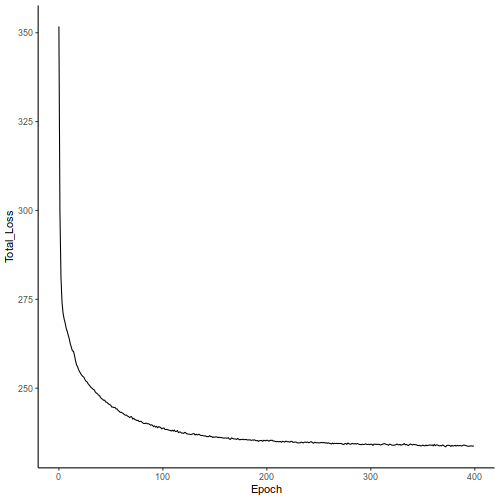

In [14]:
%%R -h 500 -w 500
Total_loss_plot <- ggplot(Loss, aes(Epoch, Total_Loss)) + geom_path() + theme_classic()
Total_loss_plot

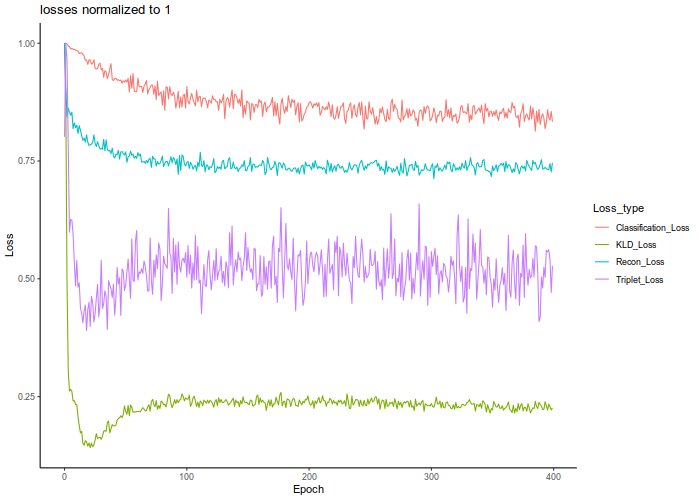

In [15]:
%%R -h 500 -w 700
Individual_loss_plot <- ggplot(Individual_losses, aes(Epoch, Loss, color = Loss_type)) + geom_path() + theme_classic() + ggtitle("losses normalized to 1")
Individual_loss_plot

In [16]:
%%R
Rs <- read.csv('/home/ssobti/projects/mir_tud/output_data/mave_output/MAVE_trial_triplet_loss_weight_100/R_tbl.csv')

epoch_1 = as.numeric(Rs[1,])
epoch_200 = as.numeric(Rs[200,])
epoch_400 = as.numeric(Rs[400,])

df <- data.frame(epoch_1, epoch_200, epoch_400)
df <- pivot_longer(df, cols = 1:3, names_to = 'Epoch', values_to = 'Rs')

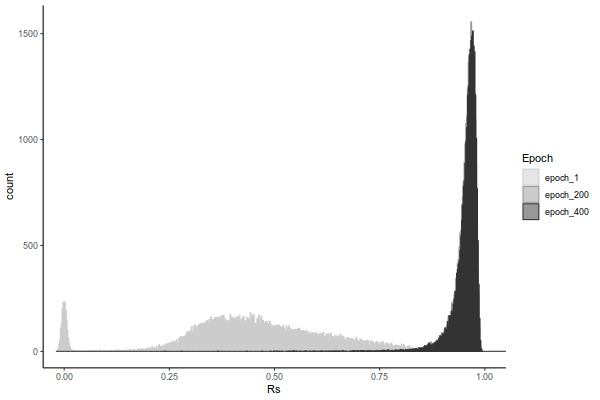

In [17]:
%%R -h 400 -w 600
R_learning <- ggplot(df, aes(x=Rs, fill=Epoch, color=Epoch)) +
geom_histogram(position="identity", alpha=0.5, bins = 200000) + scale_color_grey(start = 0.8, end = 0.2) +
scale_fill_grey(start = 0.8, end = 0.2) +
theme_classic() + coord_cartesian(xlim = c(0,1))
R_learning

In [18]:
%%R
medians <- matrixStats::rowMedians(as.matrix(Rs))
Loss$medians <- medians

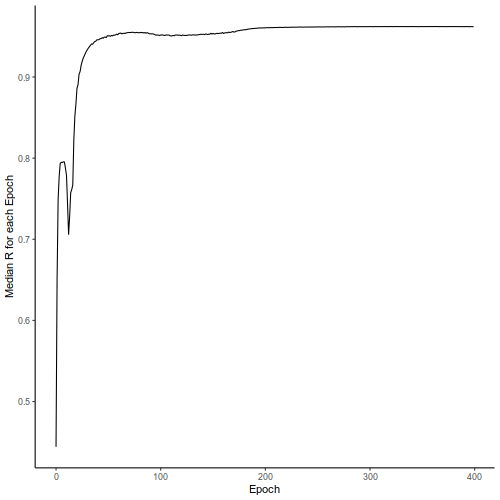

In [19]:
%%R -h 500 -w 500
R_median_plot <-ggplot(Loss, aes(Epoch, medians)) + geom_path() + ylab('Median R for each Epoch') + theme_classic()
R_median_plot

In [20]:
## plot latent space below for all pertubations (get UMAP coordinates from MAVE_trial.nbconvert.ipynb)

In [36]:
%%R
UMAP_output <- read.csv("/home/ssobti/projects/mir_tud/output_data/mave_output/MAVE_trial_triplet_loss_weight_100/UMAP-OF-MU.tsv.gz", sep = '\t', row.names = 1)
head(UMAP_output)

                             UMAP1       UMAP2           guide
miR_1:AAACCCAAGGAGAGGC-1  7.907577 -1.00799250 hsa-miR-203a-3p
miR_1:AAACCCAAGGTAAACT-1 12.008043  5.25199600   hsa-miR-93-3p
miR_1:AAACCCACAACGATCT-1 10.122237  6.90894370 hsa-miR-130b-3p
miR_1:AAACCCACACGATTCA-1  8.028935  7.00708150       TuD_NC_18
miR_1:AAACCCACAGTCAACT-1 12.449493  6.08426100 hsa-miR-147b-5p
miR_1:AAACCCACATCTCATT-1 13.560629 -0.09344875  hsa-miR-501-5p


In [37]:
%%R
library(dplyr)
MAVE_latent_2dims <- read.csv("/home/ssobti/projects/mir_tud/output_data/mave_output/MAVE_trial_triplet_loss_weight_100/scMAVE_mu-matrix.tsv.gz", sep = '\t', row.names = 1)
MAVE_latent_2dims <- select(MAVE_latent_2dims, LV.mu.0, LV.mu.1)
MAVE_latent_2dims$guide <- UMAP_output$guide
head(MAVE_latent_2dims)

                             LV.mu.0    LV.mu.1           guide
miR_1:AAACCCAAGGAGAGGC-1  0.09168807 -0.9515533 hsa-miR-203a-3p
miR_1:AAACCCAAGGTAAACT-1 -0.34811658 -0.6893007   hsa-miR-93-3p
miR_1:AAACCCACAACGATCT-1  0.29235595  0.1484665 hsa-miR-130b-3p
miR_1:AAACCCACACGATTCA-1  0.78531647  0.1226877       TuD_NC_18
miR_1:AAACCCACAGTCAACT-1 -0.25881493 -0.8298900 hsa-miR-147b-5p
miR_1:AAACCCACATCTCATT-1  0.15824646 -0.7868465  hsa-miR-501-5p


In [38]:
%%R
guides = unique(MAVE_latent_2dims$guide)
tmp_df = as.data.frame(matrix(0, nrow = nrow(MAVE_latent_2dims), ncol = length(guides)))
colnames(tmp_df) = guides
for (i in 1:length(guides)){
    guide_cells = MAVE_latent_2dims$guide == guides[i]
    vec = MAVE_latent_2dims$guide
    vec[guide_cells] = 'Guide'
    vec[!guide_cells] = 'N/A'
    tmp_df[,i] <- vec
}
MAVE_latent_2dims = cbind(MAVE_latent_2dims, tmp_df)

In [39]:
%%R
guides = unique(UMAP_output$guide)
tmp_df = as.data.frame(matrix(0, nrow = nrow(UMAP_output), ncol = length(guides)))
colnames(tmp_df) = guides
for (i in 1:length(guides)){
    guide_cells = UMAP_output$guide == guides[i]
    vec = UMAP_output$guide
    vec[guide_cells] = 'Guide'
    vec[!guide_cells] = 'N/A'
    tmp_df[,i] <- vec
}
UMAP_output_2dims = cbind(UMAP_output, tmp_df)

In [40]:
%%R
print(paste(nrow(MAVE_latent_2dims), 'rows'))
print(paste(ncol(MAVE_latent_2dims), 'columns'))
head(MAVE_latent_2dims[, 1:5])

[1] "29147 rows"
[1] "399 columns"
                             LV.mu.0    LV.mu.1           guide hsa-miR-203a-3p
miR_1:AAACCCAAGGAGAGGC-1  0.09168807 -0.9515533 hsa-miR-203a-3p           Guide
miR_1:AAACCCAAGGTAAACT-1 -0.34811658 -0.6893007   hsa-miR-93-3p             N/A
miR_1:AAACCCACAACGATCT-1  0.29235595  0.1484665 hsa-miR-130b-3p             N/A
miR_1:AAACCCACACGATTCA-1  0.78531647  0.1226877       TuD_NC_18             N/A
miR_1:AAACCCACAGTCAACT-1 -0.25881493 -0.8298900 hsa-miR-147b-5p             N/A
miR_1:AAACCCACATCTCATT-1  0.15824646 -0.7868465  hsa-miR-501-5p             N/A
                         hsa-miR-93-3p
miR_1:AAACCCAAGGAGAGGC-1           N/A
miR_1:AAACCCAAGGTAAACT-1         Guide
miR_1:AAACCCACAACGATCT-1           N/A
miR_1:AAACCCACACGATTCA-1           N/A
miR_1:AAACCCACAGTCAACT-1           N/A
miR_1:AAACCCACATCTCATT-1           N/A


In [41]:
%%R
UMAP_output[1:5,c(1,2)]

                             UMAP1     UMAP2
miR_1:AAACCCAAGGAGAGGC-1  7.907577 -1.007993
miR_1:AAACCCAAGGTAAACT-1 12.008043  5.251996
miR_1:AAACCCACAACGATCT-1 10.122237  6.908944
miR_1:AAACCCACACGATTCA-1  8.028935  7.007081
miR_1:AAACCCACAGTCAACT-1 12.449493  6.084261


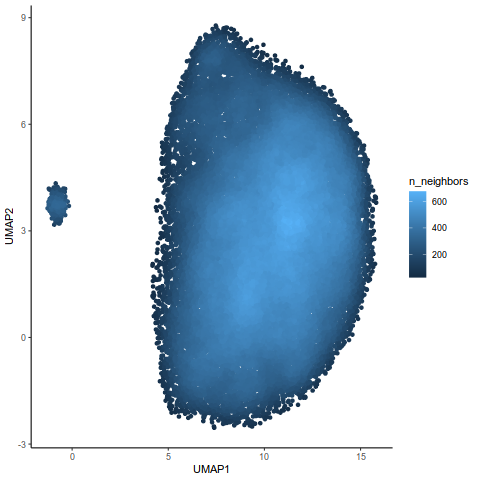

In [42]:
%%R
## density plot of cells plotted in UMAP1/UMAP2 space
library(ggplot2)
library(ggpointdensity)
library(stringr)
ggplot(UMAP_output, aes(UMAP1, UMAP2)) + geom_pointdensity() + theme_classic() +
xlab('UMAP1') + ylab('UMAP2')

In [43]:
%%R
MAVE_latent_2dims[1:5,1:5]

                             LV.mu.0    LV.mu.1           guide hsa-miR-203a-3p
miR_1:AAACCCAAGGAGAGGC-1  0.09168807 -0.9515533 hsa-miR-203a-3p           Guide
miR_1:AAACCCAAGGTAAACT-1 -0.34811658 -0.6893007   hsa-miR-93-3p             N/A
miR_1:AAACCCACAACGATCT-1  0.29235595  0.1484665 hsa-miR-130b-3p             N/A
miR_1:AAACCCACACGATTCA-1  0.78531647  0.1226877       TuD_NC_18             N/A
miR_1:AAACCCACAGTCAACT-1 -0.25881493 -0.8298900 hsa-miR-147b-5p             N/A
                         hsa-miR-93-3p
miR_1:AAACCCAAGGAGAGGC-1           N/A
miR_1:AAACCCAAGGTAAACT-1         Guide
miR_1:AAACCCACAACGATCT-1           N/A
miR_1:AAACCCACACGATTCA-1           N/A
miR_1:AAACCCACAGTCAACT-1           N/A


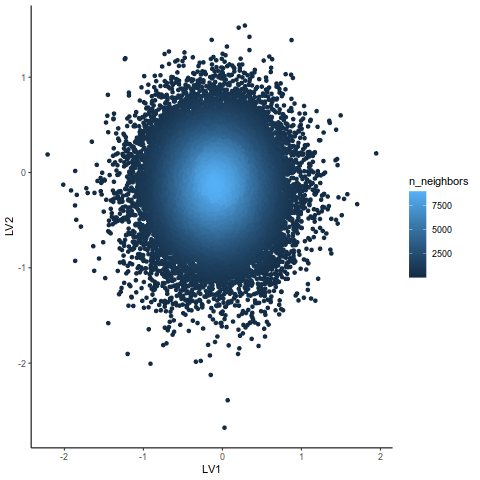

In [44]:
%%R
## density plot of cells plotted in LV.mu.0/LV.mu.1 space
library(ggplot2)
library(ggpointdensity)
library(stringr)
ggplot(MAVE_latent_2dims[,c(1,2)], aes(LV.mu.0, LV.mu.1)) + geom_pointdensity() + theme_classic() +
xlab('LV1') + ylab('LV2')


In [45]:
%%R
plts <- list()
for (i in 1:length(1:length(guides))){
    tmp <- MAVE_latent_2dims[,c(1,2,(i+3))]
    colnames(tmp)[3] <- 'Type'
    tmp <- tmp[order(tmp$Type, decreasing = TRUE),]
    if (str_sub(guides[i], start = 1, end = 6) == 'TuD_NC'){
        plts[[i]] <- ggplot(tmp, aes(LV.mu.0, LV.mu.1, color = Type)) + geom_point() + 
        theme_classic() + scale_color_manual(values = c('#39568CFF', 'gray95')) + theme(legend.position = 'none', plot.title = element_text(hjust = 0.5)) +
        ggtitle(guides[i]) + xlab('LV1') + ylab('LV2')
    } else {
        plts[[i]] <- ggplot(tmp, aes(LV.mu.0, LV.mu.1, color = Type)) + geom_point() + 
        theme_classic() + scale_color_manual(values = c('red', 'gray95')) + theme(legend.position = 'none', plot.title = element_text(hjust = 0.5)) +
        ggtitle(guides[i]) + xlab('LV1') + ylab('LV2')
    }
}


In [46]:
%%R
plts2 <- list()
for (i in 1:length(1:length(guides))){
    tmp <- UMAP_output_2dims[,c(1,2,(i+3))]
    colnames(tmp)[3] <- 'Type'
    tmp <- tmp[order(tmp$Type, decreasing = TRUE),]
    if (str_sub(guides[i], start = 1, end = 6) == 'TuD_NC'){
        plts2[[i]] <- ggplot(tmp, aes(UMAP1, UMAP2, color = Type)) + geom_point() + 
        theme_classic() + scale_color_manual(values = c('#39568CFF', 'gray95')) + theme(legend.position = 'none', plot.title = element_text(hjust = 0.5)) +
        ggtitle(guides[i]) + xlab('UMAP1') + ylab('UMAP2')
    } else {
        plts2[[i]] <- ggplot(tmp, aes(UMAP1, UMAP2, color = Type)) + geom_point() + 
        theme_classic() + scale_color_manual(values = c('red', 'gray95')) + theme(legend.position = 'none', plot.title = element_text(hjust = 0.5)) +
        ggtitle(guides[i]) + xlab('UMAP1') + ylab('UMAP2')
    }
}


In [47]:
%%R
library(ggpubr)
umap_plts <- rep(list('empty'), ceiling(length(plts2)/25))
for (i in 1:ceiling(length(plts2)/25)){
    umap_plts[[i]] <- ggarrange(plotlist = plts2[(25*(i-1)+1):(25*i)], ncol = 5, nrow = 5, legend = 'none')
}

In [48]:
%%R
library(ggpubr)
latent_plts <- rep(list('empty'), ceiling(length(plts)/25))
for (i in 1:ceiling(length(plts)/25)){
    latent_plts[[i]] <- ggarrange(plotlist = plts[(25*(i-1)+1):(25*i)], ncol = 5, nrow = 5, legend = 'none')
}

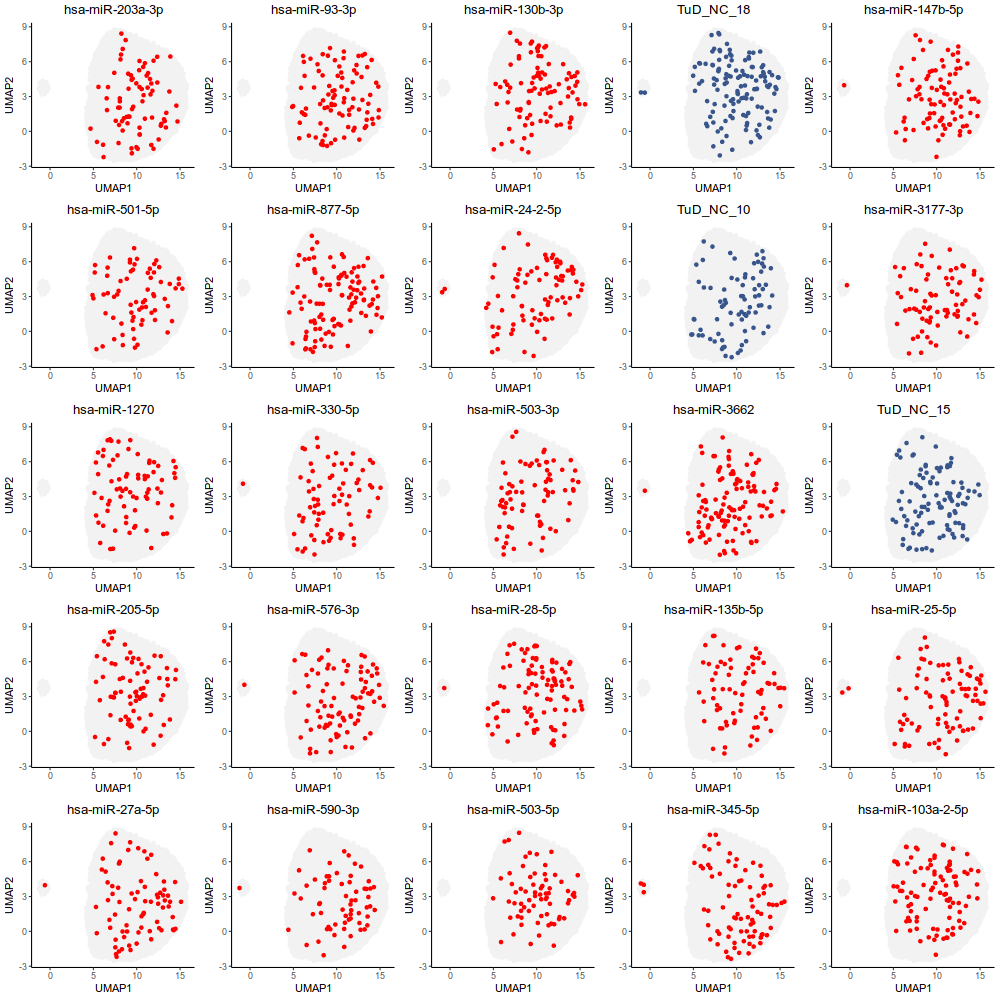

In [49]:
%%R -w 1000 -h 1000
## non-targeting control guides are blue and targeting guides are red
umap_plts[[1]]

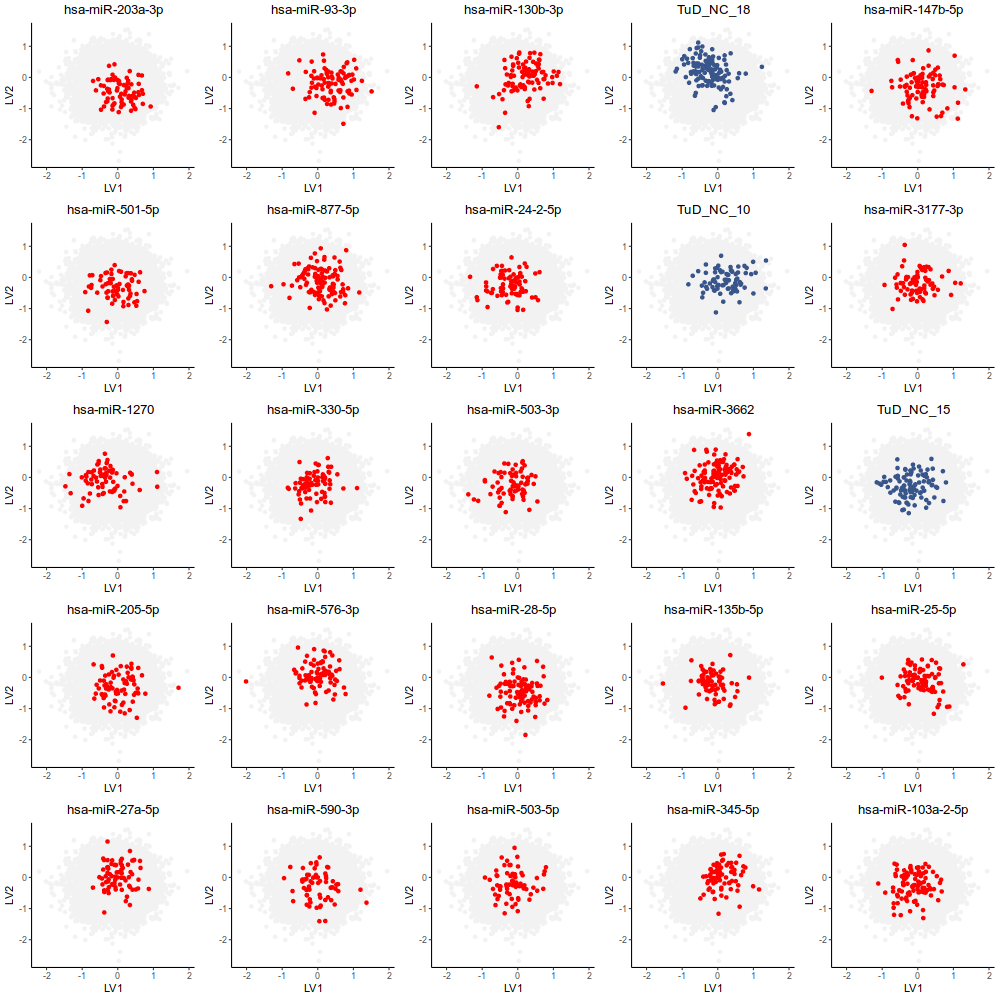

In [50]:
%%R -w 1000 -h 1000
## non-targeting control guides are blue and targeting guides are red
latent_plts[[1]]

In [35]:
%%R
## writing plots to file
pdf('/home/ssobti/projects/mir_tud/output_data/mave_output/MAVE_trial_triplet_loss_weight_100/miR_perturb_latent_maps.pdf', height = 12, width = 12)
for (i in 1:length(latent_plts)){
    print(latent_plts[[i]])
}
dev.off()

png 
  2 
